<a href="https://colab.research.google.com/github/2303a51246/2303a51246/blob/main/assingment%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Load the Titanic Ship Passengers dataset into a dataframe using pandas

import pandas as pd

# Load the Titanic dataset from a URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataframe
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# prompt: Check the data types of each feature(column) in the dataset

print(df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [3]:
# prompt: Generate a summary of the dataset for min, max, stddev,
# quartile vales for 25%,50%,75%,90%,

summary = df.describe(percentiles=[.25, .5, .75, .90])
print(summary)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000   77.958300  
max      6.

In [4]:
# prompt: List the names of columns/features in the dataset

print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


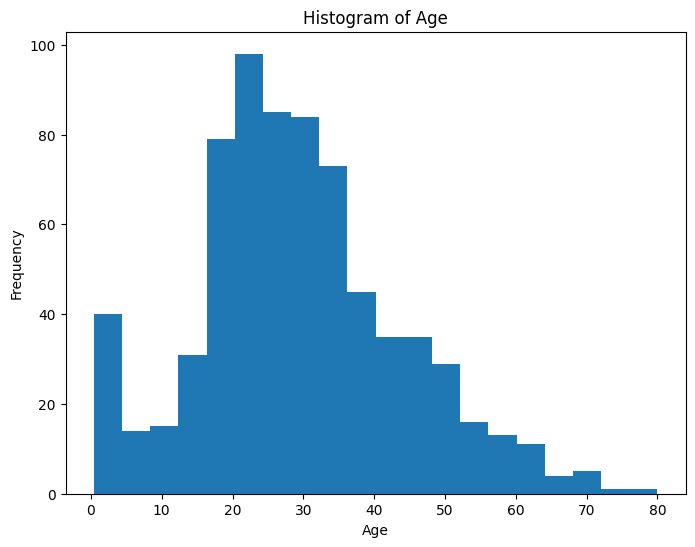

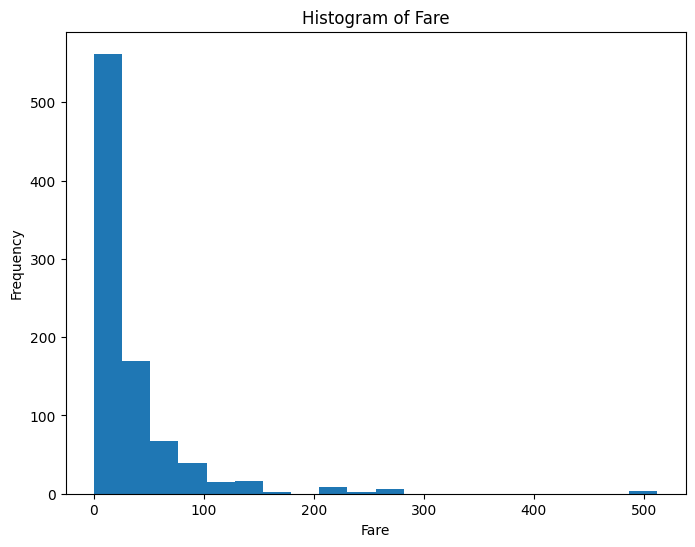

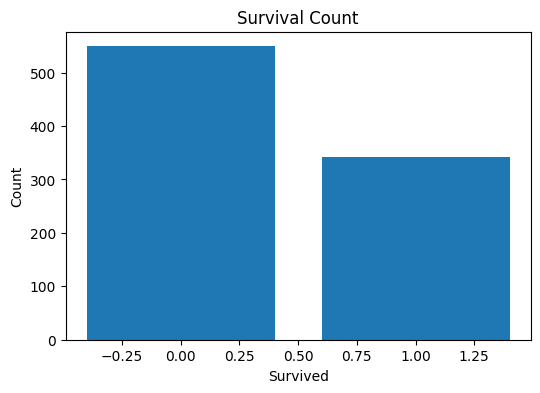

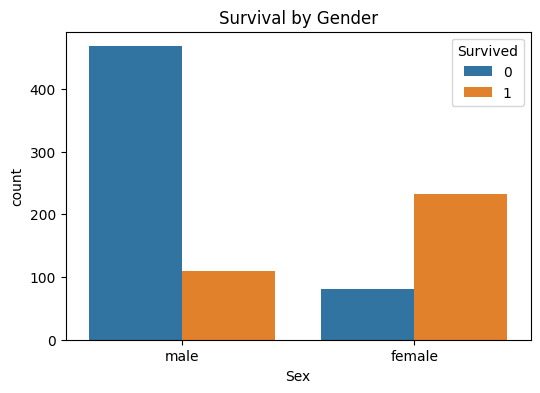

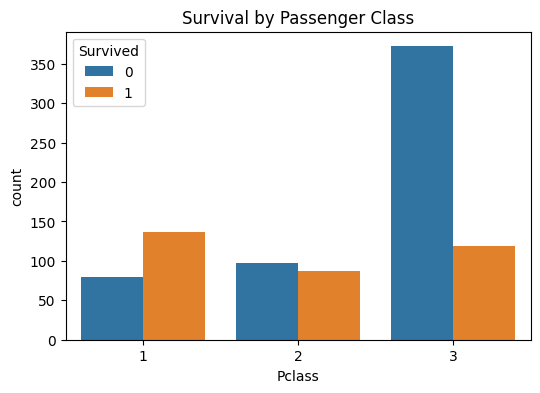

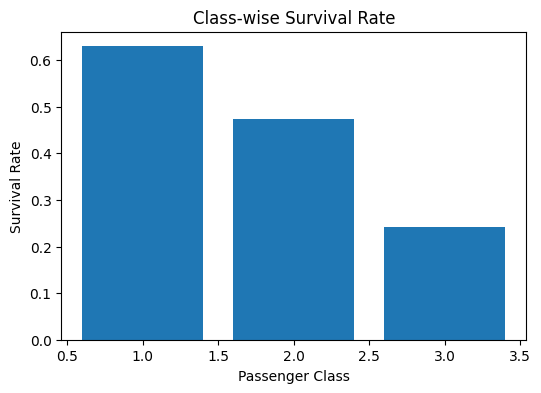

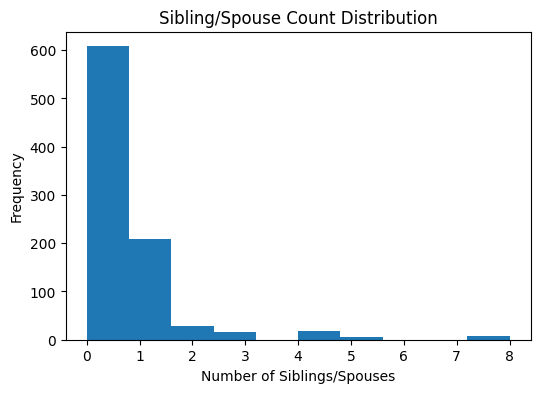

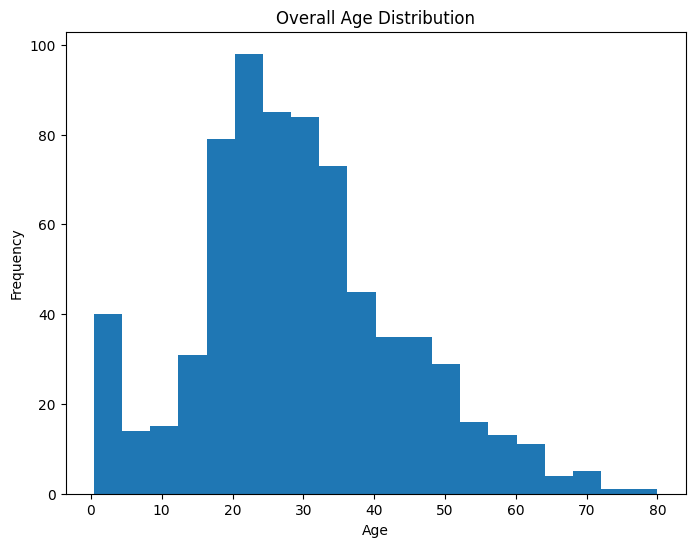

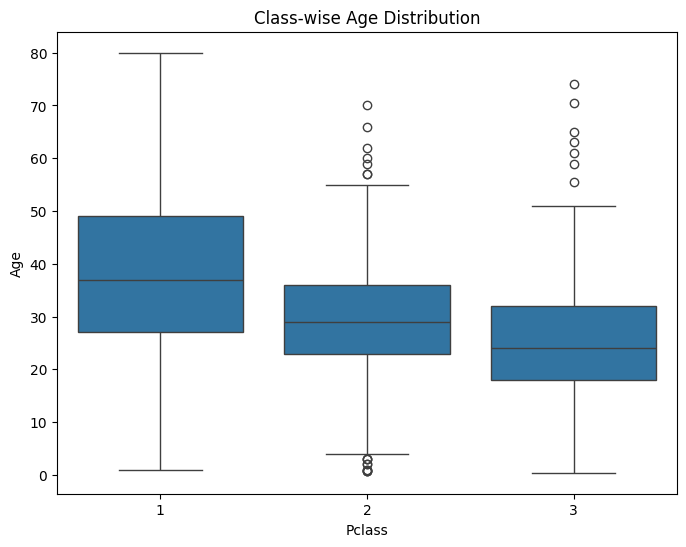

In [5]:
# prompt: Perform Exploratory analysis - plot numeric features, check relative size of survived/unsurvived, check if any pattern on gender. passenger class, class-wise survival rate, sibilings, overall age distribution, class-wise age distribution - apply bar plot, histogram,
# box plots to visualize

import matplotlib.pyplot as plt
import seaborn as sns

# Numeric Feature Plots
numeric_features = ['Age', 'Fare']
for feature in numeric_features:
  plt.figure(figsize=(8, 6))
  plt.hist(df[feature].dropna(), bins=20)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title(f'Histogram of {feature}')
  plt.show()

# Survived/Unsurvived Relative Size
survived_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

# Gender-based Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()

# Passenger Class-based Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Class-wise Survival Rate
class_survival_rate = df.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(6, 4))
plt.bar(class_survival_rate.index, class_survival_rate.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Class-wise Survival Rate')
plt.show()

# Sibling/Spouse Count Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['SibSp'], bins=10)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Frequency')
plt.title('Sibling/Spouse Count Distribution')
plt.show()

# Overall Age Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overall Age Distribution')
plt.show()

# Class-wise Age Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Class-wise Age Distribution')
plt.show()


In [6]:
# prompt: Perform data wrangling - impute age data, drop unnecessary features, recode the categorical features to a class

# Impute missing Age values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop unnecessary features
features_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']
df = df.drop(features_to_drop, axis=1)

# Recode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# You can add more re-coding for other categorical features if needed.

# Display the updated dataframe
print(df.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [7]:
# prompt: Split the data generated from list created as X, Y is distributed using train test split
# function as X train, Y train, X test, Y test

from sklearn.model_selection import train_test_split

# Assuming 'Survived' is your target variable (Y)
X = df.drop('Survived', axis=1)
Y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (712, 6)
X_test shape: (179, 6)
Y_train shape: (712,)
Y_test shape: (179,)


In [9]:
# prompt: Apply the logistic regression model of sklearn package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You might need to increase max_iter for convergence

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8100558659217877


In [10]:
# prompt:  Fit the data to the Logistic Model using fit

# Assuming 'Survived' is your target variable (Y)
X = df.drop('Survived', axis=1)
Y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # You might need to increase max_iter for convergence

# Fit the model to the training data
model.fit(X_train, Y_train)


LogisticRegression(max_iter=1000)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Error for penalty elasticnet: l1_ratio must be specified when penalty is elasticnet.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


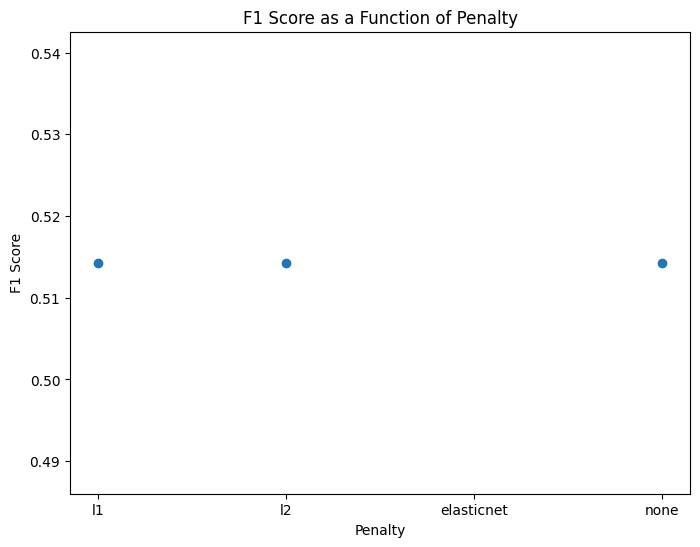

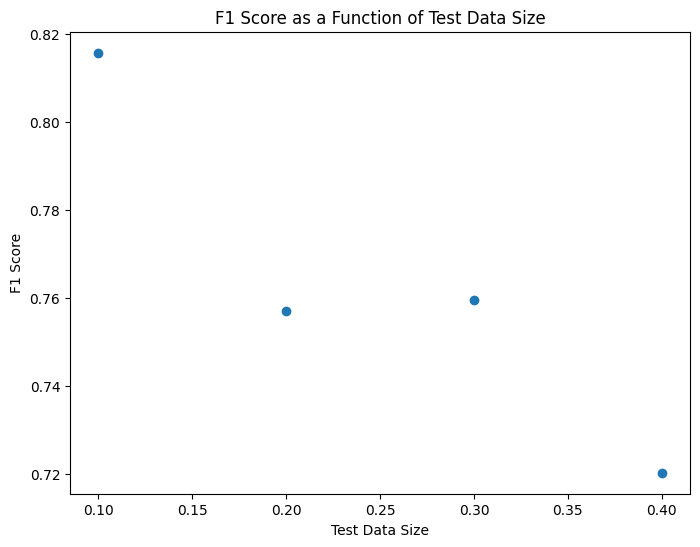

In [11]:
# prompt: Compute the F1 score as function of penalty , F1 as function of test data. Plot both
# outcomes using scatter plots.

import numpy as np
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

# Create a list of different penalty values to test
penalty_values = ['l1', 'l2', 'elasticnet', 'none']
f1_scores_penalty = []

for penalty in penalty_values:
    try:
        # Create and train the model with the current penalty
        model = LogisticRegression(max_iter=1000, penalty=penalty, solver='saga')
        model.fit(X_train, Y_train)

        # Make predictions on the test data
        Y_pred = model.predict(X_test)

        # Calculate the F1 score
        f1 = f1_score(Y_test, Y_pred)
        f1_scores_penalty.append(f1)

    except Exception as e:
        print(f"Error for penalty {penalty}: {e}")
        f1_scores_penalty.append(np.nan)


# Create a scatter plot for F1 score as a function of penalty
plt.figure(figsize=(8, 6))
plt.scatter(penalty_values, f1_scores_penalty)
plt.xlabel("Penalty")
plt.ylabel("F1 Score")
plt.title("F1 Score as a Function of Penalty")
plt.show()


# Create a list of different test data sizes to test
test_data_sizes = [0.1, 0.2, 0.3, 0.4]
f1_scores_test_data = []

for test_size in test_data_sizes:
    # Split the data into training and testing sets with the current test size
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    # Create and train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Calculate the F1 score
    f1 = f1_score(Y_test, Y_pred)
    f1_scores_test_data.append(f1)

# Create a scatter plot for F1 score as a function of test data size
plt.figure(figsize=(8, 6))
plt.scatter(test_data_sizes, f1_scores_test_data)
plt.xlabel("Test Data Size")
plt.ylabel("F1 Score")
plt.title("F1 Score as a Function of Test Data Size")
plt.show()
